In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('Train week 24.csv',index_col = ['datetime'], parse_dates = True)
df.head(2)

,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
datetime,,,,,,,,,,,
2015-01-31 01:00:00,962.2865,906.9580,970.3450,938.004850,1,1,0,0,1,25.308496,954.2018
2015-01-31 02:00:00,933.3221,863.5135,912.1755,900.284075,1,1,0,0,2,25.141443,913.8660


<AxesSubplot:xlabel='datetime'>

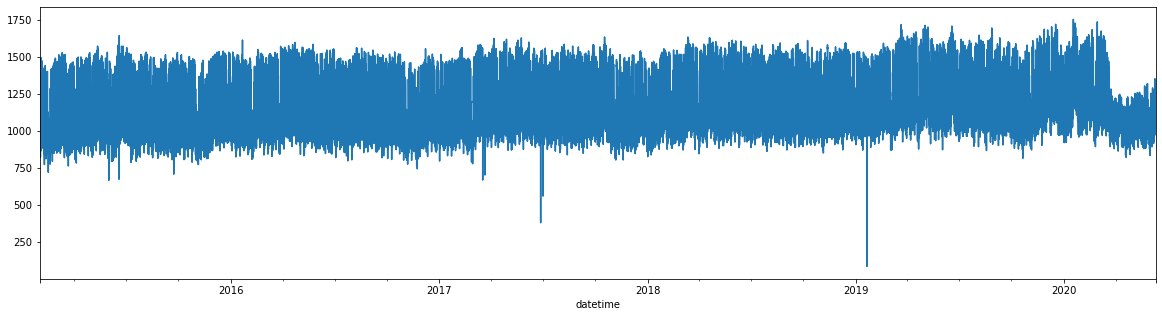

In [3]:
df['DEMAND'].plot(figsize = (20,5), label = 'training dataset')

<AxesSubplot:>

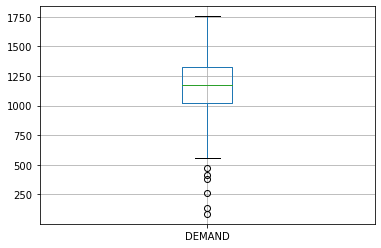

In [4]:
df.boxplot('DEMAND')

In [5]:
def detect_outliers_iqr(data):
    outliers = []
    #data = sorted(data)
    q1 = data['DEMAND'].quantile(0.25)
    q3 = data['DEMAND'].quantile(0.75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    idx = 2
    idx_list = []
    for i in list(data['DEMAND']): 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
            idx_list.append(idx)
        idx = idx + 1
    data.loc[data['DEMAND'] < lwr_bound, 'DEMAND'] = np.nan
    data.loc[data['DEMAND'] > upr_bound, 'DEMAND'] = np.nan
    return outliers, data, idx_list# Driver code

In [6]:
sample_outliers, p_data, index_of_out = detect_outliers_iqr(df)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [380.5936, 85.1925, 135.7636, 263.6183, 417.4492, 475.8024]


In [8]:
pd.isnull(p_data['DEMAND']).sum()

6

In [9]:
index_of_out

[21085, 34813, 34814, 34815, 34816, 34817]

<AxesSubplot:xlabel='datetime'>

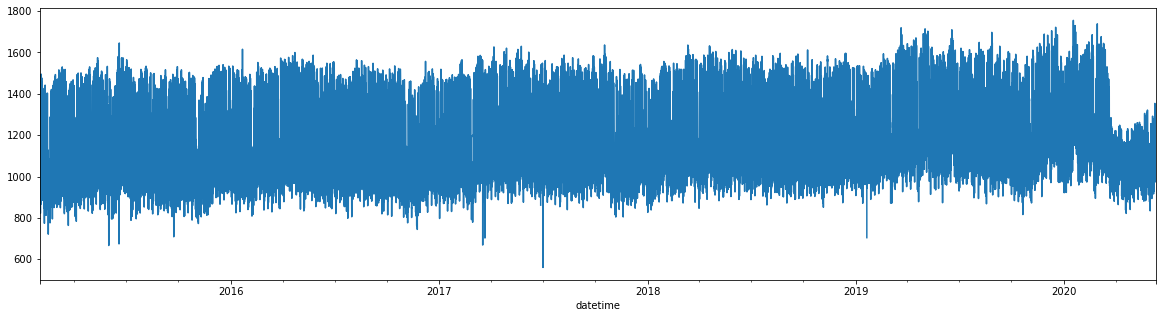

In [10]:
df['DEMAND'].plot(figsize = (20,5), label = 'training dataset')

In [11]:
p_data.reset_index(inplace = True)

In [12]:
p_data.to_csv('Outlier_Identified in week 24.csv',index = False)